# **Proyecto 3 - Aprendizaje Automatico de Maquina**
**Estudiantes**
* Dayana Valentina Gonzalez Vargas
* Juan Manuel Ramirez Osuna 


## **Antecedentes**
Después de la gran pandemia del Covid-19, diferentes empresas de turismo tuvieron que realizar cambios en sus paquetes de seguros de viaje que sean más adecuados para el bienestar de los turistas promoviendo nuevas ideas en cuanto a una cobertura del Covid, pero quieren asegurarse de que los clientes estén dispuestos a adquirir este nuevo paquete de seguros. De esta manera se tienen bases de datos que recolectan información que diferencian a los viajeros y si deciden o no comprar un paquete de seguros. Entre esas bases de datos usaremos los datos históricos de los clientes en el periodo del 2019  demostrando el rendimiento y las ventas de este paquete en ese periodo.

## **Descripción del problema**

Las empresas necesitan optimizar costos gracias a las pérdidas, cambios de consumo y alteraciones de los precios causados durante el covid 19. Esto junto a un impulso en la digitalización y por tanto en la recolección de datos hace más importante que nunca conocer el mercado al que se atiende. Por lo tanto se busca poder predecir qué características de un consumidor hacen más probable que este adquiera el seguro de vida. De esto se hace necesario buscar un modelo que pueda predecir con mayor precisión la propensión de un cliente a comprar el seguro y la importancia de las variables consideradas en esta decisión.

## **Descripción de la solución**
Se buscará implementar algoritmos de clasificación basados en características particulares del cliente que permitan identificar si estaría interesado en comprar el paquete de seguros que ofrece la empresa de turismo. Para esto se explorarán múltiples métodos de clasificación como una regresión logística, knn, árboles de decisión, redes neuronales y svm.

##**Datos**
El dataset base fue extraído de: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data Se usarán las siguientes variables del dataset:
 * *Age*: Edad del cliente
 * *Employement type*: El sector para el cual trabajan los clientes.
 * *GraudeorNot*: Si el cliente es universitario o no.
 * *Annuallncome*: Los ingresos anuales del cliente en rupias indias [redondeados a la cifra más próxima de 50.000 rupias].
 * *FamilyMembers*: Número de miembros de la familia del cliente.
 * *ChronicDisease*: Si el cliente padece alguna enfermedad o afección grave, como diabetes, hipertensión o asma, etc.
 * *FrequentFlyer*:  Datos derivados basados en el historial del cliente de reserva de billetes de avión en al menos 4 instancias diferentes en los últimos 2 años[2017-2019].
 * *EverTravelledAbroad*: ¿Ha viajado el cliente alguna vez a un país extranjero [no necesariamente para utilizar los servicios de la empresa]?
 * *TravelInsurance*: Compró el cliente el paquete de seguro de viaje durante la oferta introductoria celebrada en el año 2019

La variable *TravelInsurance* será nuestra variable objetivo para poder predecir si un cliente quiere acceder al paquete de seguros de viaje que ofrece la compañía.



## **Métricas**

Debido a que se utilizaron  modelos de clasificación se empleará la matriz de confusión, la metrica de  recall, la metrica del acurracy y la precisión. En el caso de la red neuronal se emplea binaria entropía cruzada en la fase de entrenamiento.




## **Librerías** 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as plot_confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data 
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn import preprocessing 

### **Cargar Datos**

In [ ]:
url = 'https://raw.githubusercontent.com/DayaVale/Talleres_Machine_learning/master/Proyecto%203/Dataset/TravelInsurancePrediction.csv'
insuranceData = pd.read_csv(url, sep = ',').dropna()
insuranceData.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## **Análisis del dataset**
Notemos que el conjunto de datos tiene un tamaño de:

In [ ]:
insuranceData.shape

(1987, 10)

Este conjunto de datos cuenta con variables tanto numericas como categóricas.

In [ ]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
insuranceData['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

La variable *FamilyMembers* podria ser cambiada a categórica ya que sus datos podrian darnos más información al quitar el comportamiento ordenado de los datos.

In [ ]:
# Cambiar a dummies
insuranceData['FamilyMembers'].value_counts()

4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64

### **Variable Objetivo**


Notemos que nuestra variable objetivo esta un poco desbalanceada pero no es algo muy grave para este proyecto.



In [ ]:
insuranceData['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

### **Modificar Dataset** 

**Eliminar Columnas**

Tenemos la variable en la cual se encuentran los indices del conjunto de datos, como esta variable no es necesaria la eliminamos del conjunto de datos.


In [ ]:
insuranceData = insuranceData.drop(columns= ['Unnamed: 0'])

Volver las variables que sean categoricas a variables dummies.

In [ ]:
insuranceData = pd.get_dummies(insuranceData, ['Employment Type','EverTravelledAbroad','FrequentFlyer','GraduateOrNot'], drop_first= True)


In [ ]:
insuranceData.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Private Sector/Self Employed,EverTravelledAbroad_Yes,FrequentFlyer_Yes,GraduateOrNot_Yes
0,31,400000,6,1,0,0,1,0,0
1,31,1250000,7,0,0,1,1,0,0
2,34,500000,4,1,1,1,1,0,0
3,28,700000,3,1,0,1,1,0,0
4,28,700000,8,1,0,1,1,1,0


## **Funciones** 
Estas funciones nos ayudarar a determinar la matriz de confusión y evaluar tres metricas importantes como son el recall, la presición y el acurracy que estan dadas por las siguientes ecuaciones:
$$ recall = \frac{TP}{TP+FN}$$

$$presicion = \frac{TP}{TP+FP}$$

$$acurracy = \frac{TP+TN}{TP+TN+FP+FN}$$


In [ ]:
def Matrix_Confusion_metrics(y_pred, y_test):
  cm = confusion_matrix(y_test, y_pred)
  disp = plot_confusion_matrix(confusion_matrix=cm)
  disp.plot()
  recall = recall_score(y_test, y_pred, average='binary')
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("presicion:", precision_score(y_test, y_pred))
  print('Recall:', recall)

## **Division del dataset**

Dividimos el dataset en un conjunto de test y un conjunto de train con los siguientes porcentajes. 
- **Train** 80%
- **Test** 20%


In [ ]:
# Division en variable objetivo
y = insuranceData['TravelInsurance']
X = insuranceData.drop(columns= ['TravelInsurance'])

# Division de los datos en train y en test
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 42
                                    )


Para realizar tambien una comparación tomamos la variable *FamilyMembers* y la volvimos categorica, así para tener un poco más de variables. Además tambien realizamos una division del dataset, en los mismos porcentajes de Train y test comentados anteriormente.

In [ ]:
# Volvemos la columna FamilyMembers Dummie
X2 = pd.get_dummies(X, columns = ['FamilyMembers'], drop_first=True)

# Dividimos este nuevo dataset X2 en Train y Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X2,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 42
                                    )


 ### **Estandarización del Dataset**
 Cuando hablamos de escalamiento y estandarización nos referimos a multiplicar por la *media* y dividir por la *desviación estandar*.

 Escalamos inicialmente el conjunto X de train y test el cual no se combirtio la variables *FamilyMembers* en dummies.

In [ ]:
# Escalador 
scaler_train = preprocessing.StandardScaler()
scaler_test = preprocessing.StandardScaler()

scaler_train.fit(X_train)
scaler_test.fit(X_test)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

Tambien escalamos El conjunto X2 el cual cuenta con la variable *FamilyMemmbers* en forma de dummies.

In [ ]:
# Escalador
scaler_train2 = preprocessing.StandardScaler()
scaler_test2 = preprocessing.StandardScaler()

scaler_train2.fit(X_train2)
scaler_test2.fit(X_test2)

X_train2_scaled = scaler_train2.transform(X_train2)
X_test2_scaled = scaler_test2.transform(X_test2)

## **Modelo Inicial**
Se desarrollara un modelo de clasificación con un arbol de desición para poder obtener una aproximación inicial a nuestro problema desde el cual comparar la eficiencia de otros modelos de mayor potencia o rigurosidad con un modelo sencillo. 
### **Modelo de Arbol de desición**

Este primer modelo es con la variable *FamilyMembers* de manera normal y no dummies. Se empleara el criterio de entropia y todo lo demas se mantendra estandar.

In [ ]:
#Modelo de arbol de desición
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

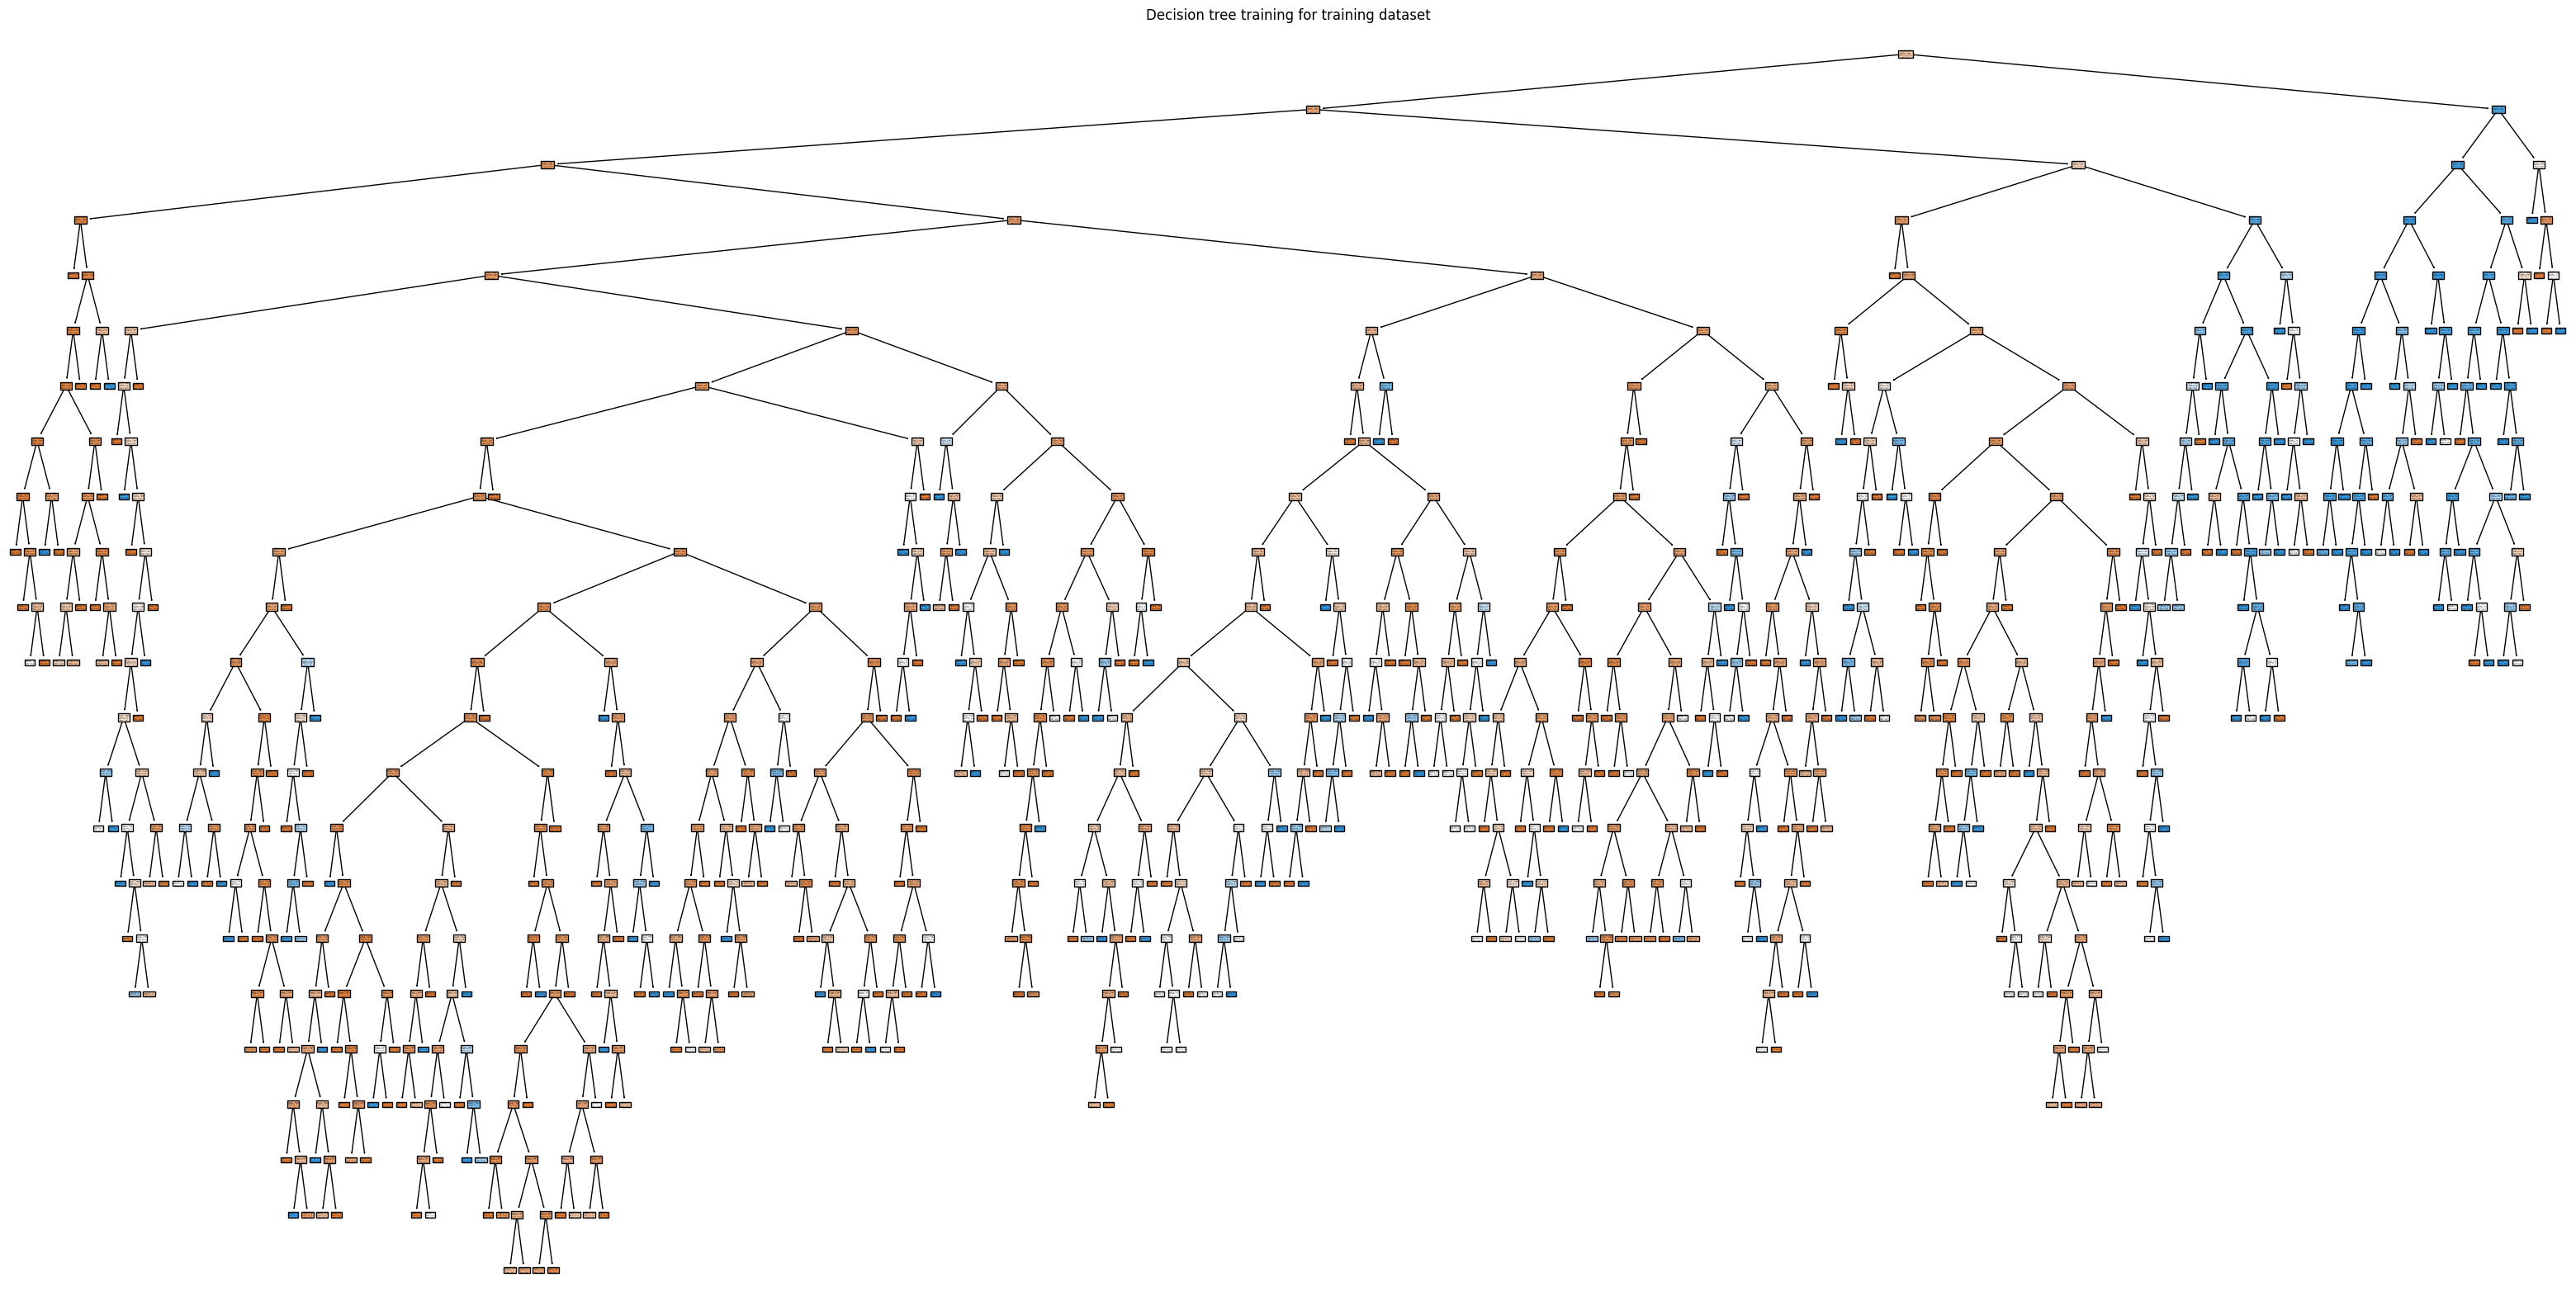

In [ ]:
#print("Accuracy de entrenamiento:", modelo.score(X, y))
plt.figure(figsize=(40,20))
plot_tree(tree_clf, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()

Este primer modelo es con la variable *FamilyMembers* de manera dummies

In [ ]:
tree_clf2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_clf2.fit(X_train2_scaled, y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

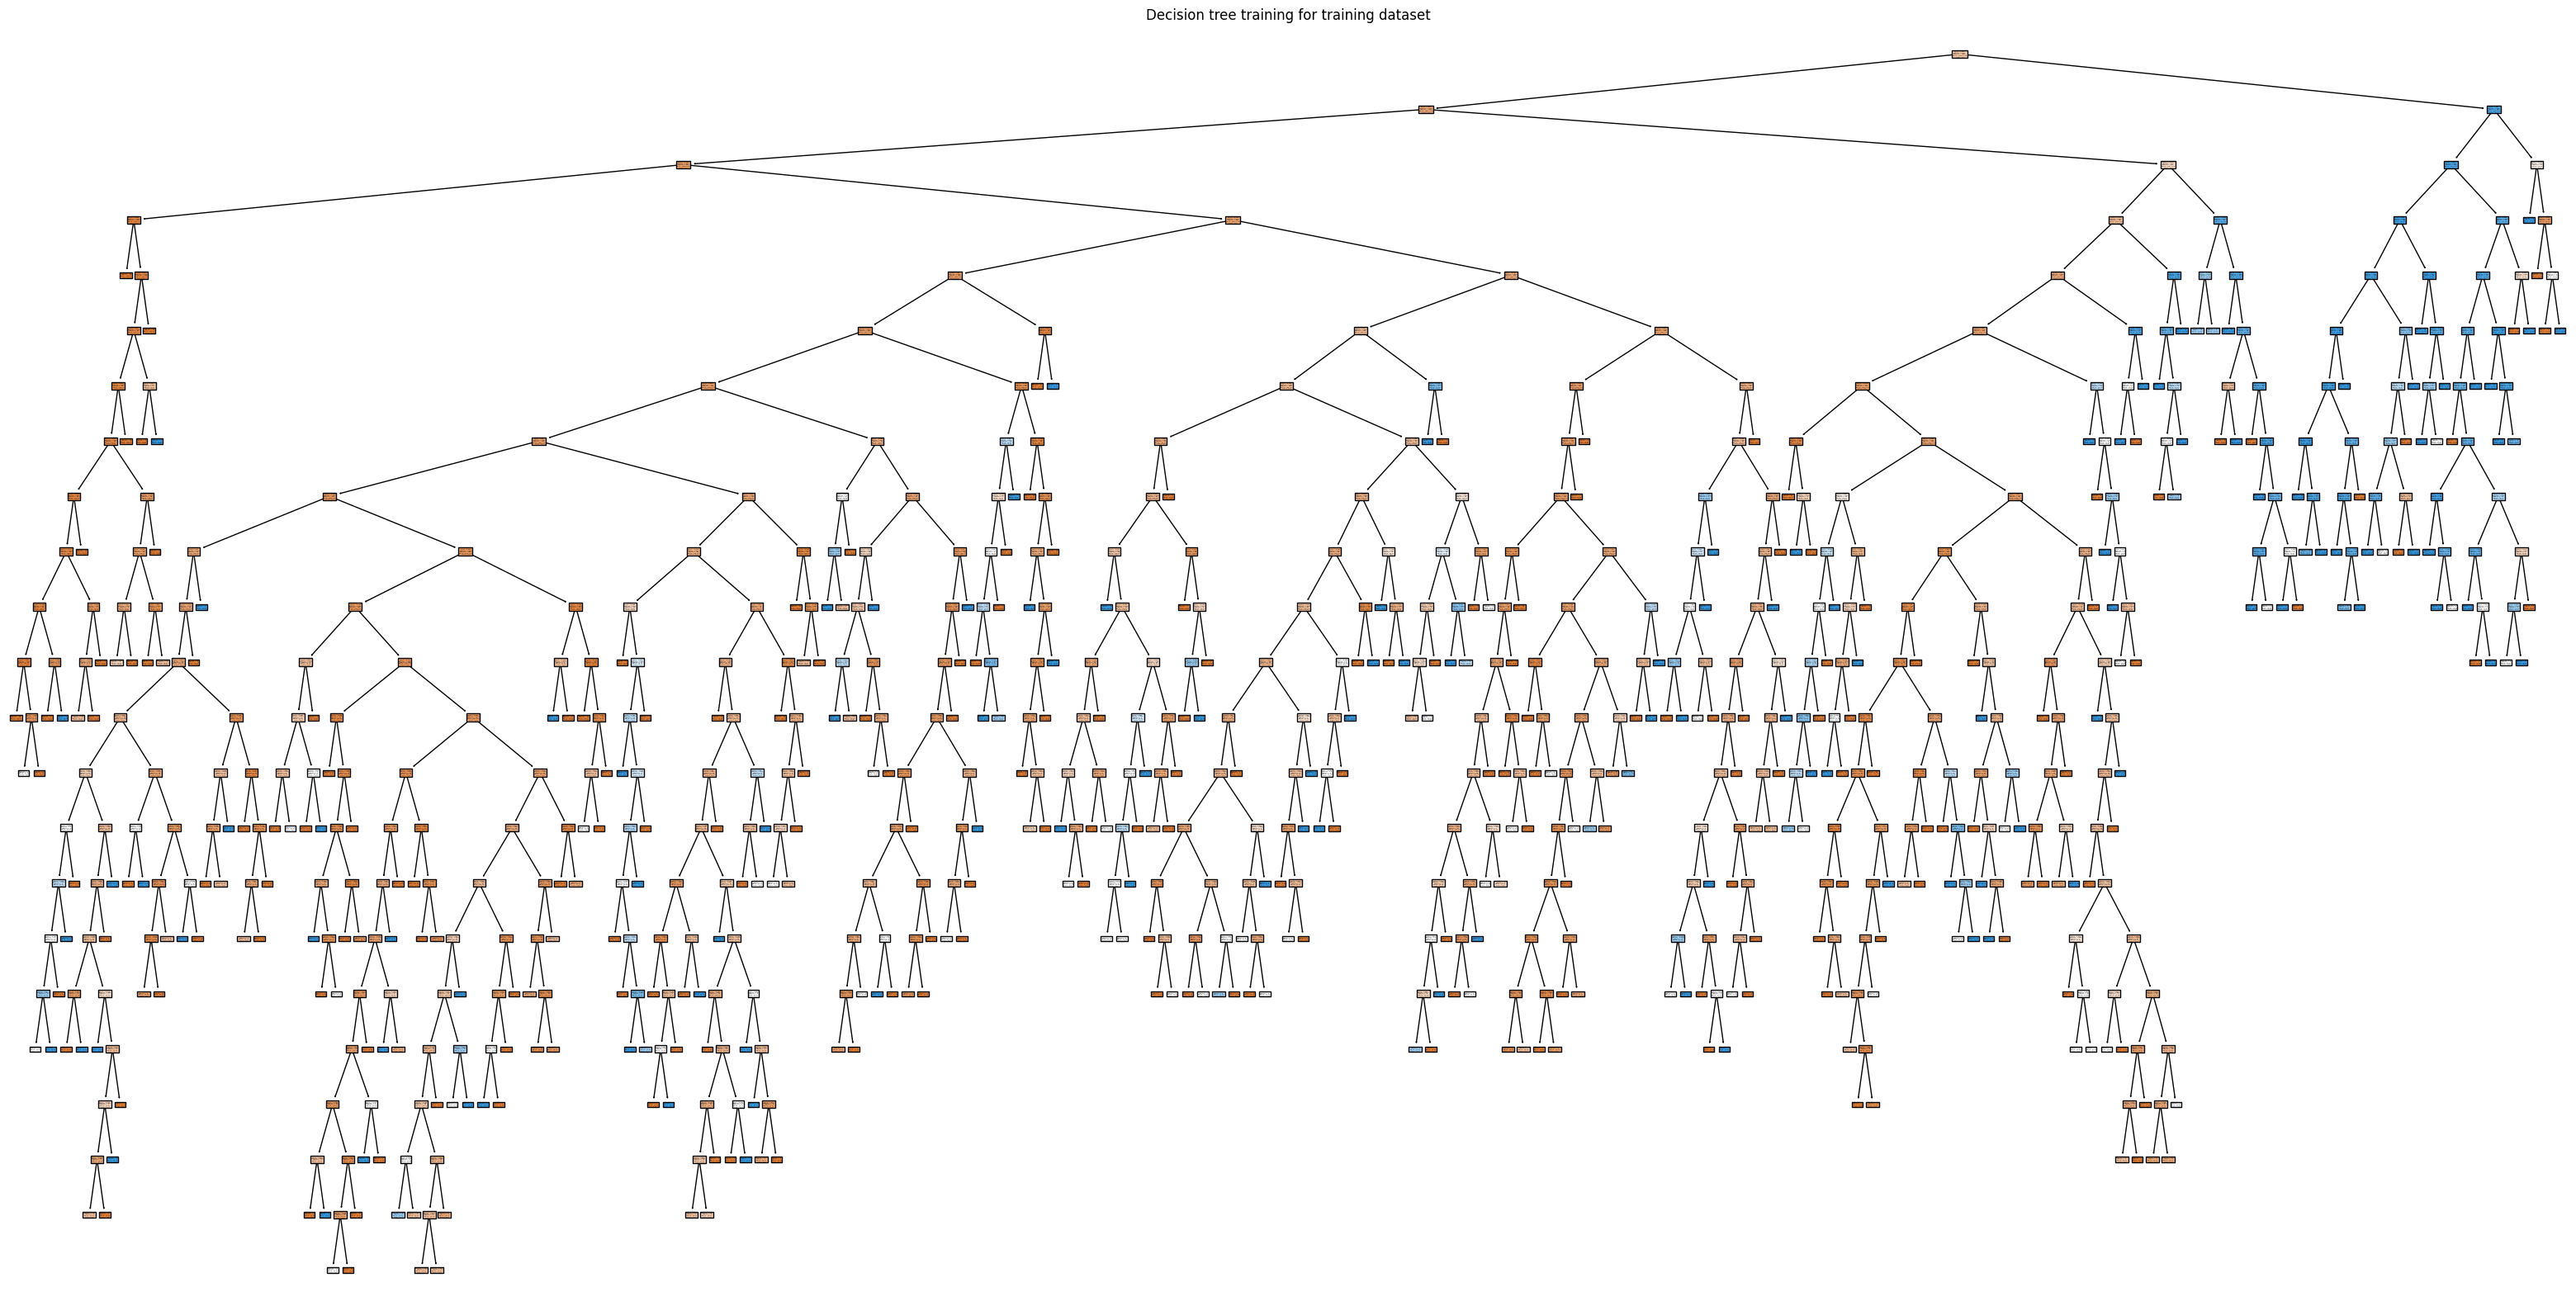

In [ ]:
#print("Accuracy de entrenamiento:", modelo.score(X, y))
plt.figure(figsize=(40,20))
plot_tree(tree_clf2, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()

**Nota:** Obtuvimos que en ambos arbol de desición  se muestran un poco complejo, donde no se puede determinar a simple vista como es el camino para llegar a una classificación. Algunas ideas que pensamos ver más adelante del proyecto es realizar una podación del arbol o utilizar random forest. Además veremos otros modelos como knn y redes neuronales.

**Evaluar el modelo**

Primero evaluamos el modelo con las variables normales y escaladas.

In [ ]:
# Predicciones dadas por el modelo mediante el X_test
y_tree_pred = tree_clf.predict(X_test_scaled)

El modelo obtuvo una buena presición a pesar a pesar de tener un arbol un poco complejo. Pero es un buen punto de partida para continuar probando diferentes modelos y tecnicas.

Accuracy: 0.8040201005025126
presicion: 0.7560975609756098
Recall: 0.6595744680851063


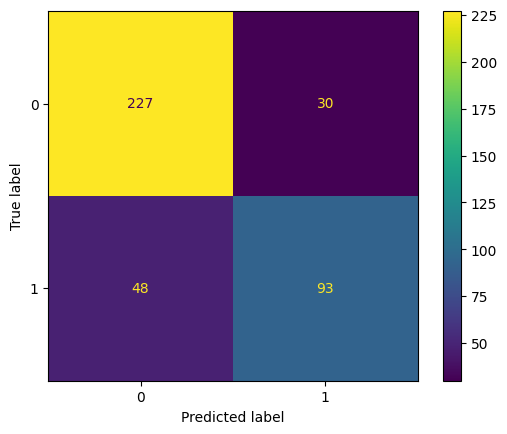

In [ ]:
Matrix_Confusion_metrics(y_tree_pred, y_test)

Ahora, evaluaremos el modelo con la variable *FamilyMembers* de manera dummies.

In [ ]:
y_tree_pred2 = tree_clf2.predict(X_test2_scaled)

Accuracy: 0.8040201005025126
presicion: 0.7480314960629921
Recall: 0.6737588652482269


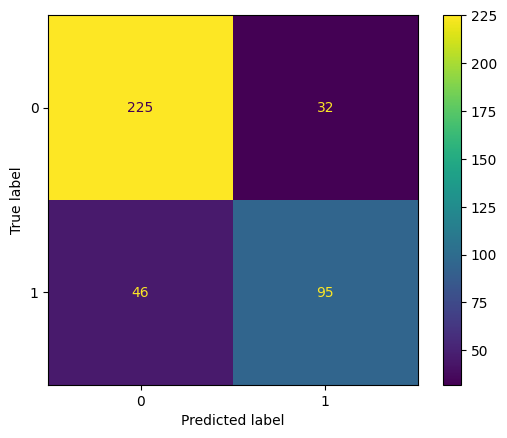

In [ ]:
Matrix_Confusion_metrics(y_tree_pred2, y_test2)

**Nota:** Notemos que a pesar de que ambos modelos implementados anteriormente tuvieron un mismo valor en la metrica *Acurracy* los valores dados referentes a las metricas de *Recall* y *Precision* variaron es decir que a pesar de que tuvo un buen *Acurracy* no nos indica que vayan a tener un mejor *Recall* o *presicion*. entre estos modelos el que dio mejor metrica entre el recall fue el modelo realizado con la variable *FamilyMemmbers* como dummie.

## **Modelos**

En esta sección probaremos nuevos modelos que contribuyan a mejorar la clasificación de nuestra variable objetivo y los cuales puedes ser un poco más complejos pero obtener mejor presición.

###**Model Arbol de desición Podado**

Veremos inicialmente el resultado dado al podar el arbol de desición dado anteriormente con los datos que no cuentan con la variable *FamilyMembers* como dummies. 

In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

besto = 0
besto_alfa = 0
for i in range(len(ccp_alphas)):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha = ccp_alphas[i] )
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    prec = metrics.accuracy_score(y_test, y_pred)
    if prec > besto:
        besto = prec
        besto_alfa = ccp_alphas[i]
        
print("Mejor precision es:", besto, "con alfa:", besto_alfa)

Mejor precision es: 0.8467336683417085 con alfa: 0.0020088189663407426


#### **Muestra del arbol podado**

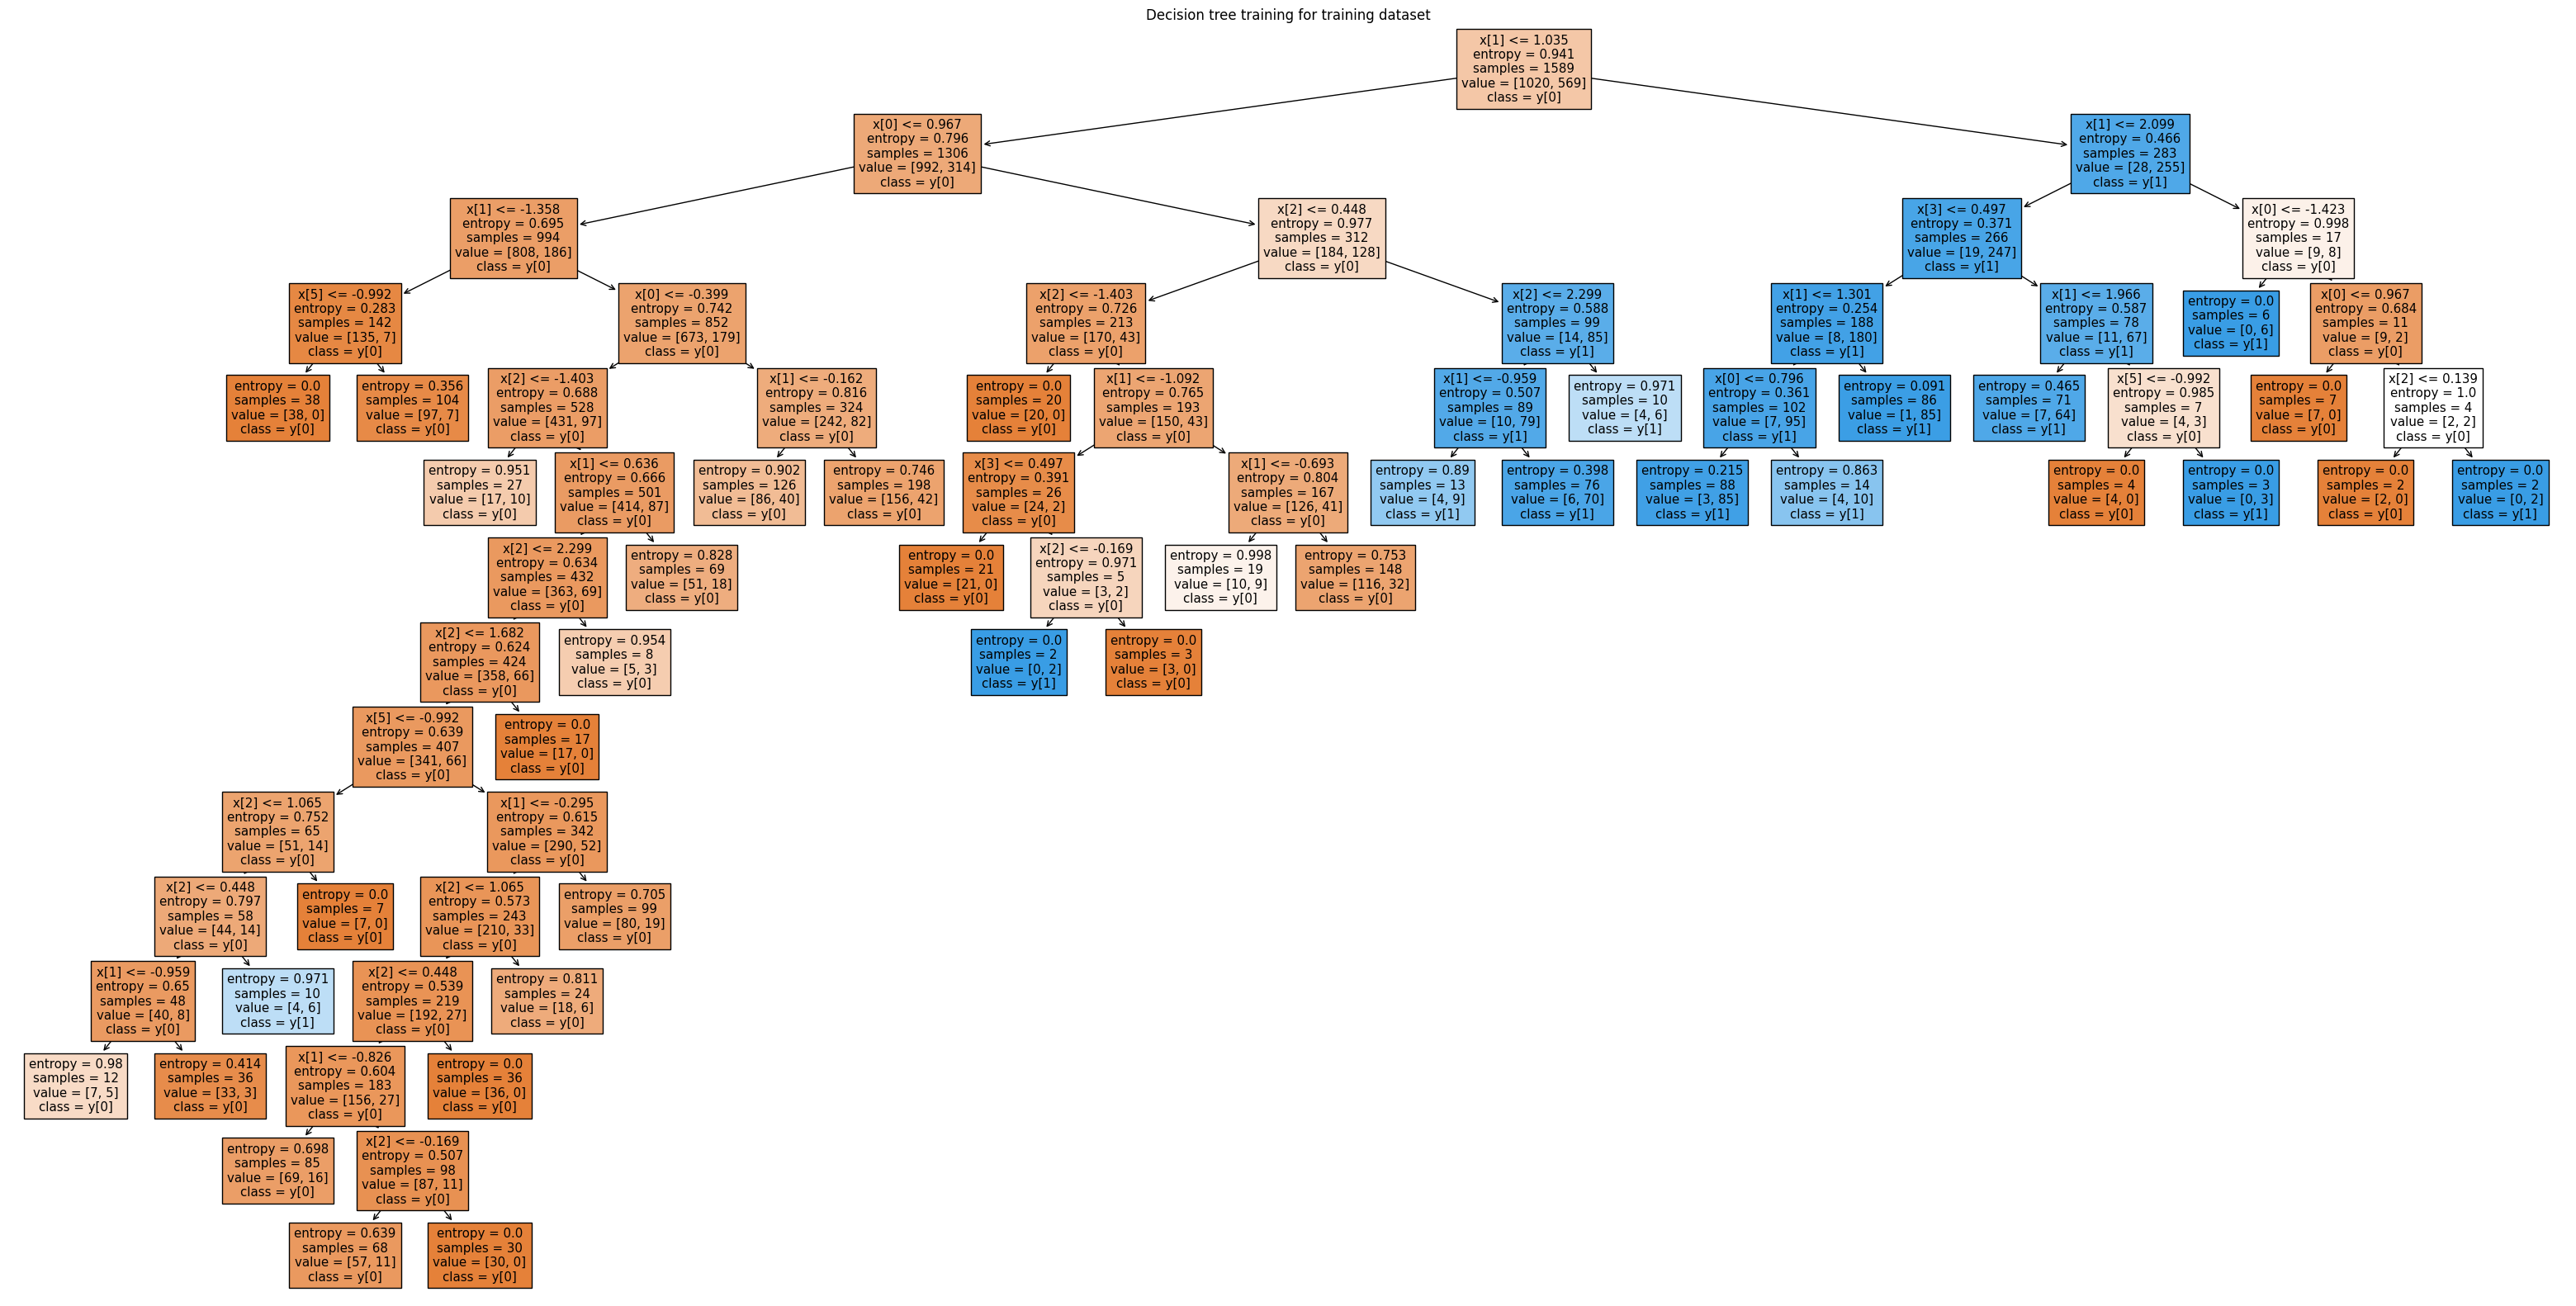

In [ ]:
best_tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha = besto_alfa)
best_tree_clf.fit(X_train_scaled, y_train)
y_podadotree_pred = best_tree_clf.predict(X_test_scaled)

plt.figure(figsize=(40,20))
plot_tree(best_tree_clf, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()


**Evaluar el modelo**

Accuracy: 0.8467336683417085
presicion: 0.9651162790697675
Recall: 0.5886524822695035


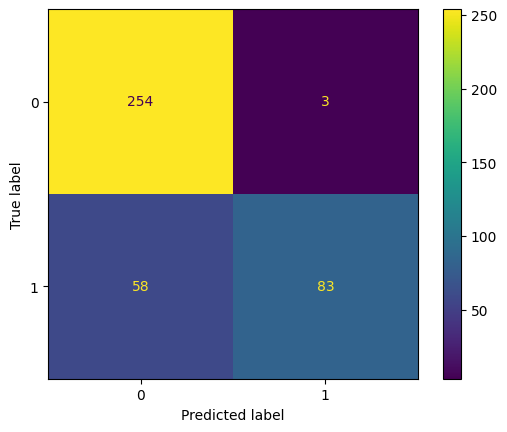

In [ ]:
## Metricas a evaluar
Matrix_Confusion_metrics(y_podadotree_pred , y_test)

El resultado dado al podar el arbol de desición dado anteriormente con los datos que cuentan con la variable *FamilyMembers* como dummies. 

In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train2_scaled, y_train2)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

besto2 = 0
besto_alfa2 = 0
for i in range(len(ccp_alphas)):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha = ccp_alphas[i] )
    clf.fit(X_train2_scaled, y_train)
    y_pred = clf.predict(X_test2_scaled)
    prec = metrics.accuracy_score(y_test2, y_pred)
    if prec > besto2:
        besto2 = prec
        besto_alfa2 = ccp_alphas[i]
        
print("Mejor precision es:", besto2, "con alfa:", besto_alfa2)

Mejor precision es: 0.8517587939698492 con alfa: 0.0028157296220304925


#### **Muestra del arbol podado**

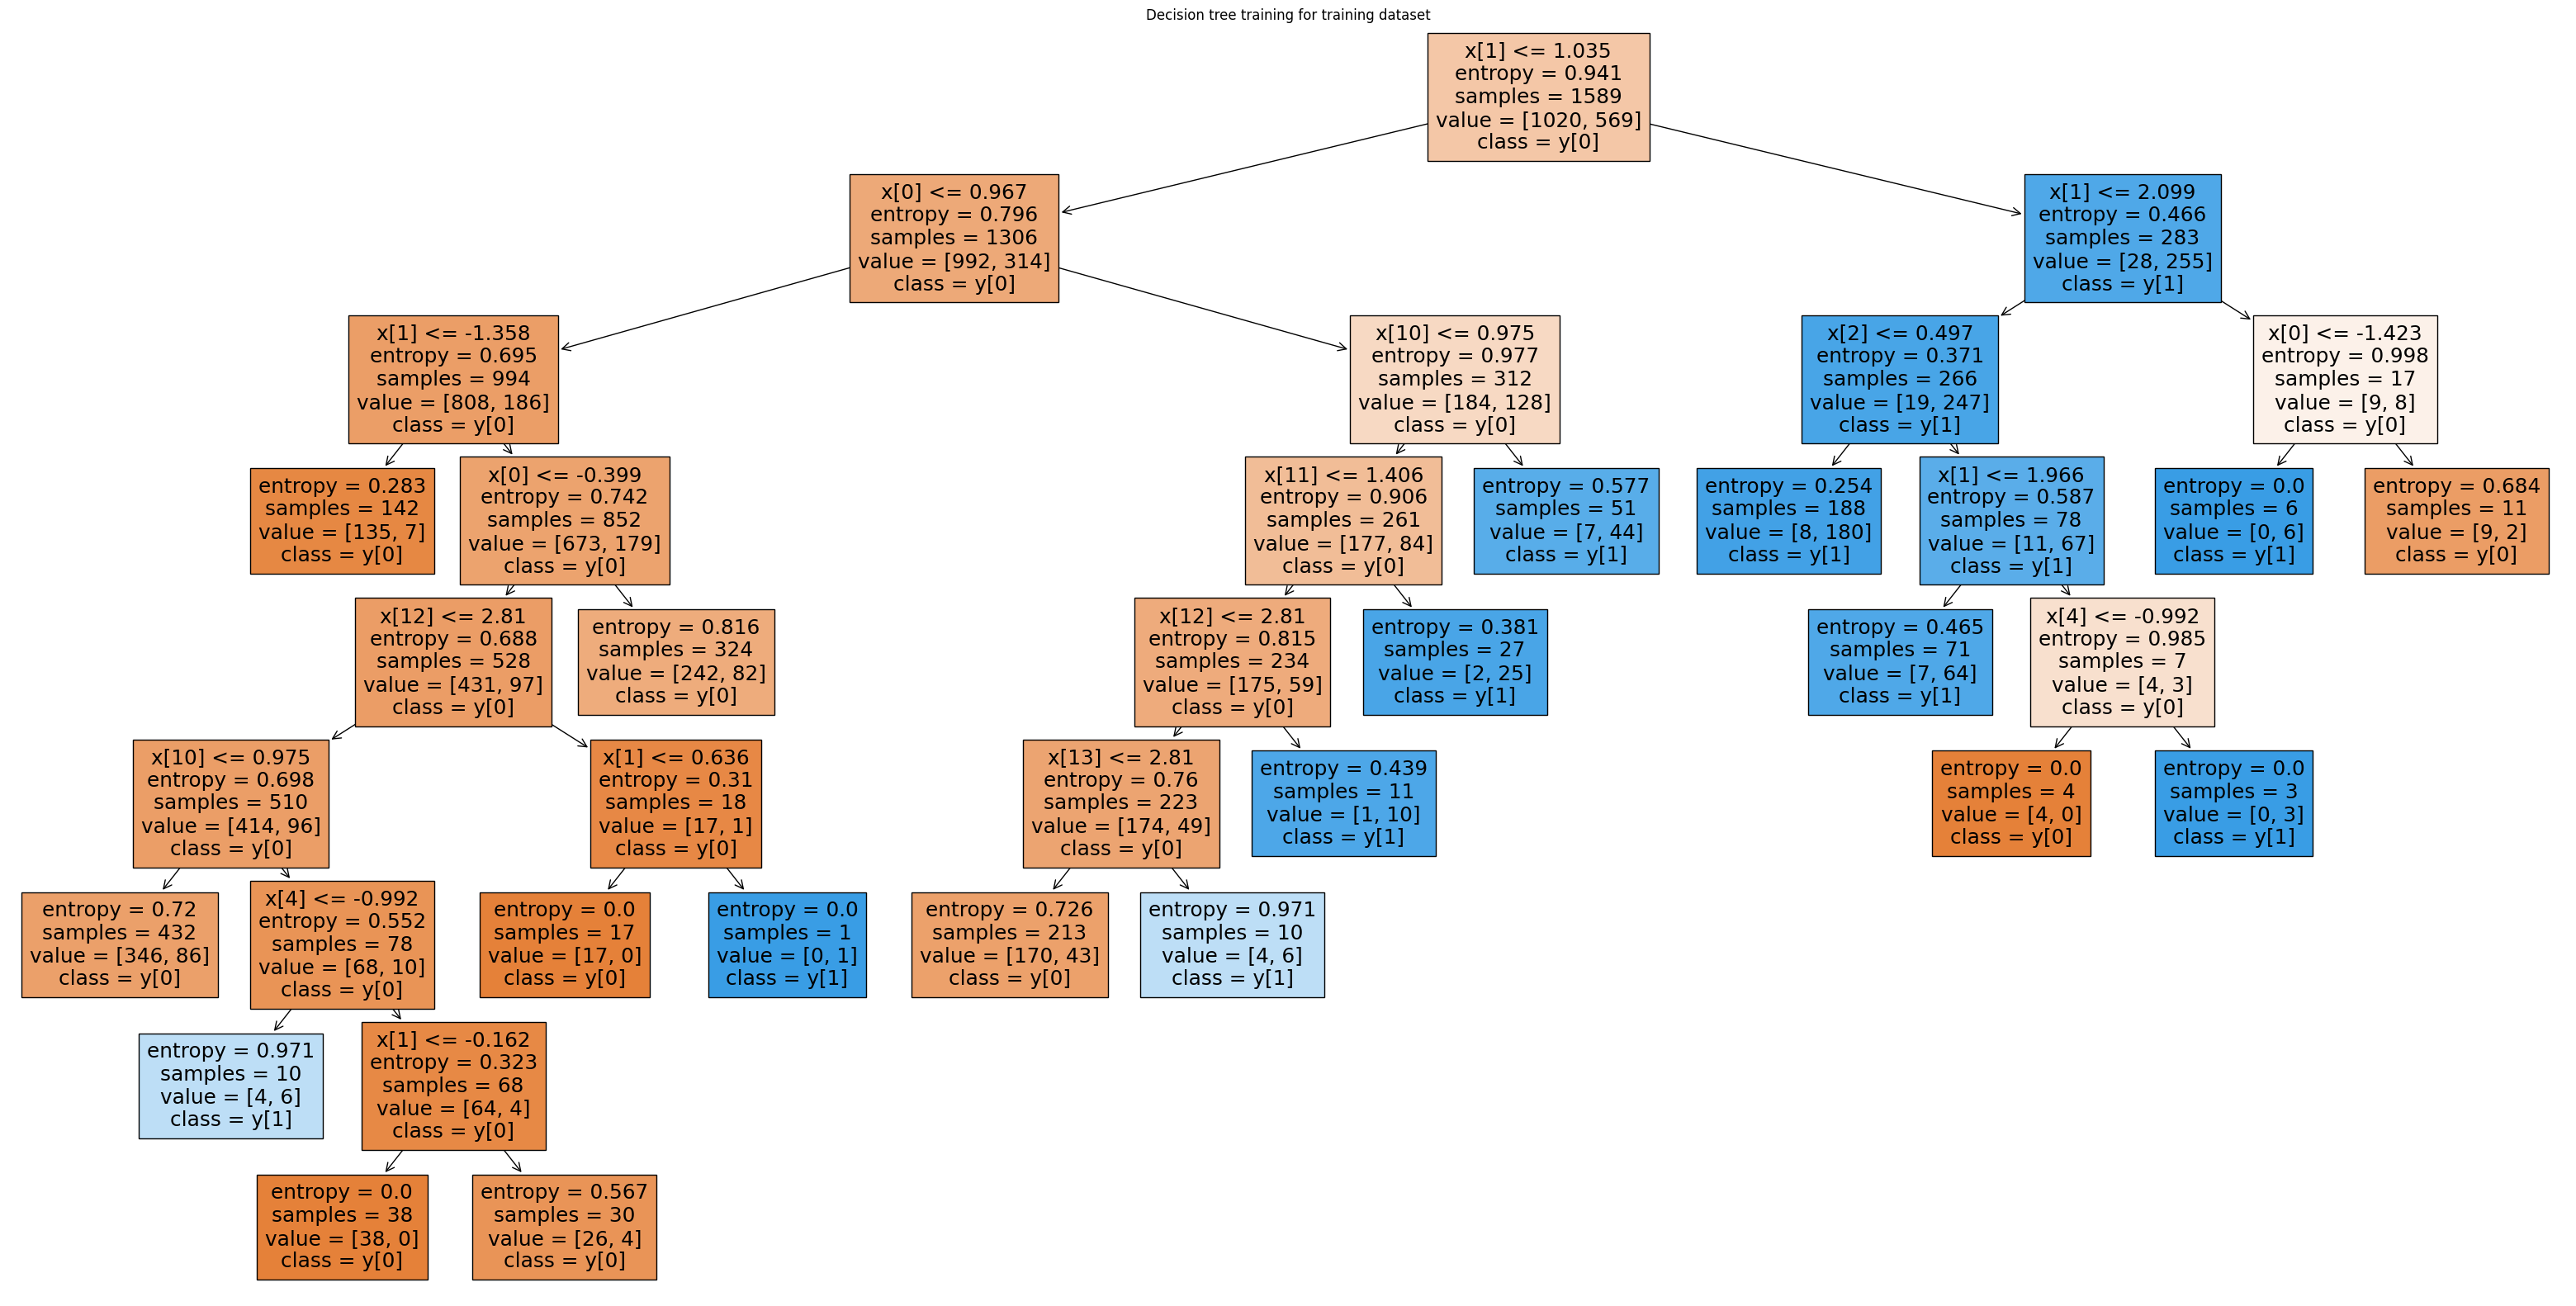

In [ ]:
best_tree_clf2 = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha = besto_alfa2)
best_tree_clf2.fit(X_train2_scaled, y_train2)
y_podadotree_pred2 = best_tree_clf2.predict(X_test2_scaled)

plt.figure(figsize=(40,20))
plot_tree(best_tree_clf2, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()

**Evaluar el Modelo**

Accuracy: 0.8517587939698492
presicion: 0.9880952380952381
Recall: 0.5886524822695035


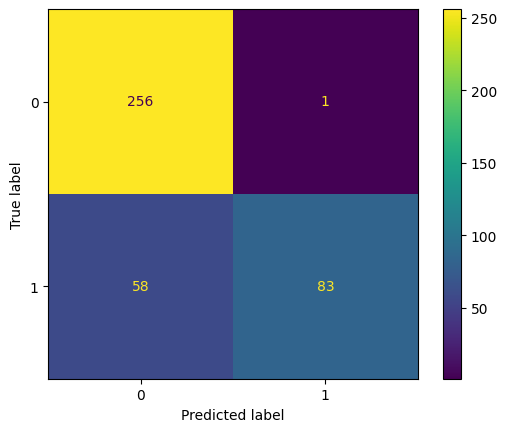

In [ ]:
Matrix_Confusion_metrics(y_podadotree_pred2 , y_test2)

**Nota:** Los modelos anteriores presentan una mejoría significativa con respecto al árbol inicial llegando a una mejor precisión de alrededor de 5 puntos porcentuales. Similarmente la precisión aumenta en gran medida, pero el recall cae. Entre los dos casos, el uso de la cantidad de familiares como una variable categórica presenta mejores resultados. 

Este modelo tiene un mejor rendimiento en general que el simple, pero la perdida en *recall indica que no es una opción ideal si se tiene un mayor peso a los falsos negativos que a los falsos positivos*. Esta condición se traduce a que no es un modelo viable si la empresa prefiere no perder clientes a costa de invertir en publicidad para viajeros que no van a comprar.

## **Modelo de Random Forest**
Modelo utilizando los datos que no cuentan con la variable *FamilyMembers* como dummies. 


In [ ]:
rfor_clf = RandomForestClassifier(random_state=0, criterion='entropy')
rfor_clf.fit(X_train_scaled, y_train)
# Predicciones dadas por el modelo mediante el X_test
y_rfor_pred = rfor_clf.predict(X_test_scaled)

Accuracy: 0.8115577889447236
presicion: 0.7894736842105263
Recall: 0.6382978723404256


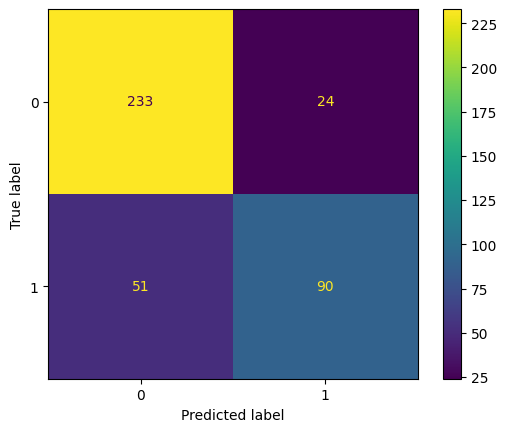

In [ ]:
## Metricas y matriz de confusion
Matrix_Confusion_metrics(y_rfor_pred , y_test)

Modelo utilizando los datos que cuentan con la variable *FamilyMembers* como dummies.

In [ ]:
rfor_clf2 = RandomForestClassifier(random_state=0, criterion='entropy')
rfor_clf2.fit(X_train2_scaled, y_train2)
# Predicciones dadas por el modelo mediante el X_test
y_rfor_pred2 = rfor_clf2.predict(X_test2_scaled)

Accuracy: 0.8090452261306532
presicion: 0.782608695652174
Recall: 0.6382978723404256


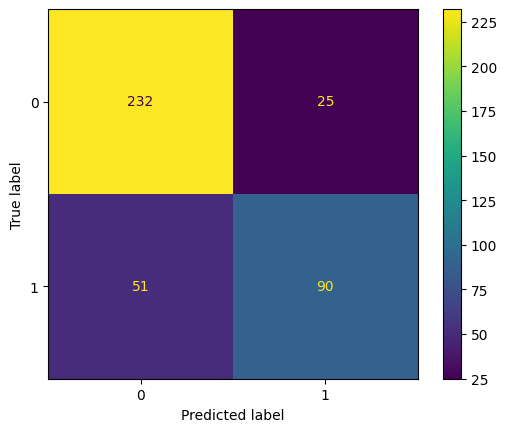

In [ ]:
Matrix_Confusion_metrics(y_rfor_pred2 , y_test2)

**Nota:** El resultado obtenido es ligeramente mejor al obtenido en el modelo inicial. Los cambios en accuracy, precisión y recall no justifican el cambio del modelo. Entre los dos casos para la variable de family members también se encuentra que tiene pocos efectos en el desempeño. Igualmente, el modelo de random forest que obtuvo un mejor *acurracy* fue al no comvertir la variable *Family members* pero de resto explican de igual manera.


## **Modelo de K-nearest neighbors (Knn)**
Para el caso de KNN se realizarán dos análisis de búsqueda de parámetros; se buscará la cantidad de vecinos optima haciendo un barrido desde 1 vecino hasta 99 y se comparara el caso sin pesos con el peso de distancia. De este modo se obtendrá el modelo con mejor accuracy.

*Modelo utilizando los datos que  no cuentan con la variable *FamilyMembers* como dummies.*

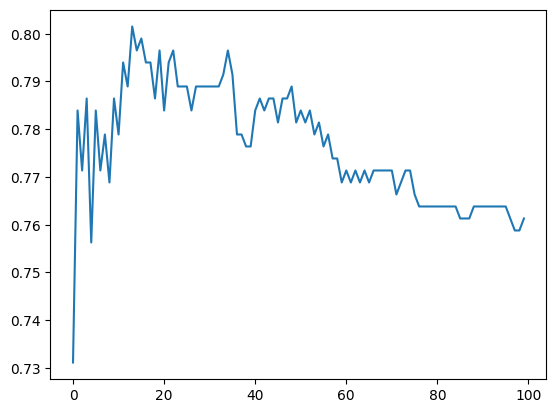

In [ ]:
scores = []
for i in range(100):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train_scaled, y_train)
    scores.append(neigh.score(X_test_scaled,y_test))
plt.plot(scores)

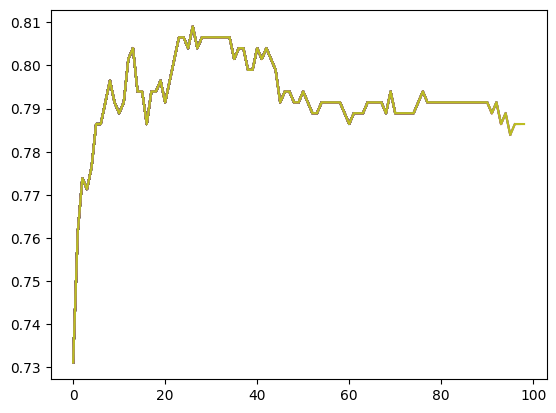

In [ ]:
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train_scaled,y_train)
  s=knn.score(X_test_scaled,y_test)
  scores.append(s)
  plt.plot(scores)

In [ ]:
best_neigh = KNeighborsClassifier(n_neighbors=11)
best_neigh.fit(X_train_scaled, y_train)
y_neigh_pred = best_neigh.predict(X_test_scaled)

**Evaluar Modelo**

Accuracy: 0.7788944723618091
presicion: 0.7676767676767676
Recall: 0.5390070921985816


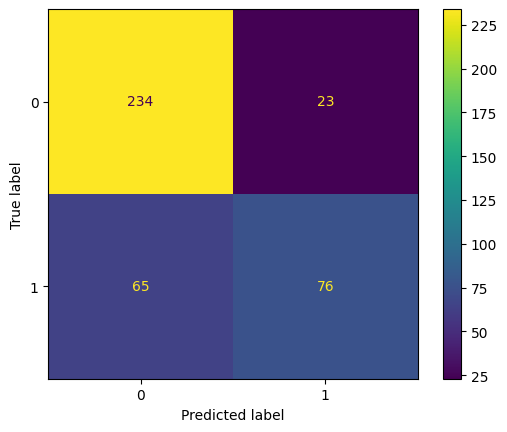

In [ ]:
## Metricas y matriz de confusion
Matrix_Confusion_metrics(y_neigh_pred , y_test)

Modelo utilizando los datos que cuentan con la variable *FamilyMembers* como dummies.

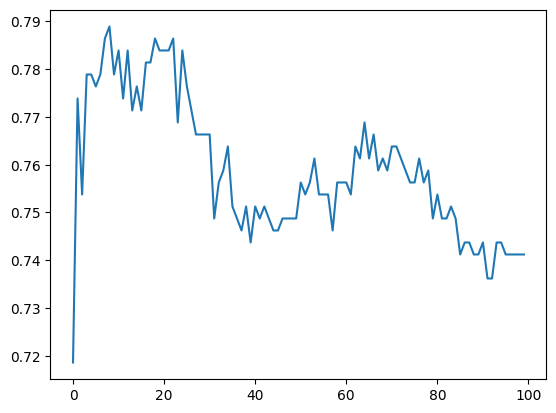

In [ ]:
scores = []
for i in range(100):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train2_scaled, y_train2)
    scores.append(neigh.score(X_test2_scaled,y_test2))
plt.plot(scores)

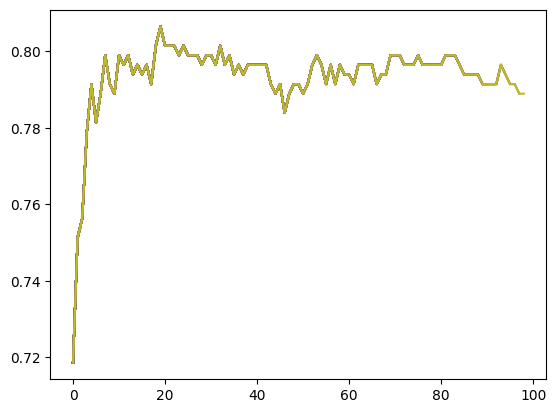

In [ ]:
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train2_scaled,y_train2)
  s=knn.score(X_test2_scaled,y_test2)
  scores.append(s)
  plt.plot(scores)

In [ ]:
best_neigh2 = KNeighborsClassifier(n_neighbors=8)
best_neigh2.fit(X_train2_scaled, y_train2)
y_neigh_pred2 = best_neigh2.predict(X_test2_scaled)

**Evaluar Modelo**

Accuracy: 0.7864321608040201
presicion: 0.8181818181818182
Recall: 0.5106382978723404


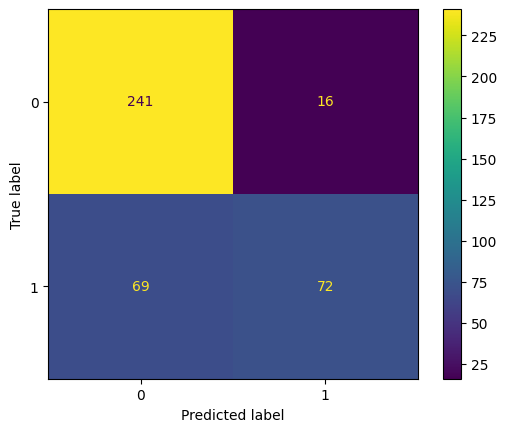

In [ ]:
Matrix_Confusion_metrics(y_neigh_pred2 , y_test2)

**Nota:** En este caso se encuentra un resultado peor que el del modelo inicial de modo que es subóptimo el uso de knn para la solución del problema planteado. Es interesante considerar que estos modelos fueron probados previamente a la escala de los datos, por lo tanto, es posible que para este caso la perdida de magnitudes haya significado una perdida en eficiencia del modelo. Además notemque el número de k-vecinos reduce al utilizar el modelo con la variable *FamilyMembers* donde este k = 8 y obtiene un mayor *Acurracy* del 78% y una mayor *Presicion* con 81% pero un poco menor en la matrica del *Recall* con 51%. Pero en el otro utilizamos un k = 11 y obtenemos un mayor *Recall* pero un menor *Acurracy* de 77% y *presicion* de 76%.

## **Support Vector Machine**
A continuación, se utilizará el método de Support Vector Machine para la clasificación. Inicialmente se realizará una búsqueda de parámetros óptimos mediante la función GridSearchCV para ambos casos de entradas.

Modelo utilizando los datos que  no cuentan con la variable *FamilyMembers* como dummies.

In [ ]:
num_features = np.size(X_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]


optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0 
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
clf_svm = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
clf_svm.fit(X_train_scaled, y_train)
y_svm_pred = clf_svm.predict(X_test_scaled)

**Evaluar el modelo**

Accuracy: 0.7462311557788944
presicion: 0.7564102564102564
Recall: 0.41843971631205673


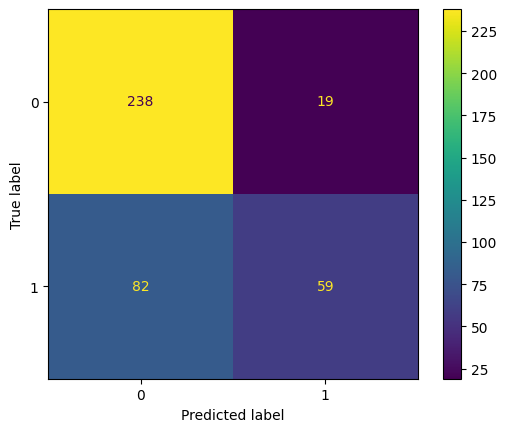

In [ ]:
## Metricas y matriz de confusion
Matrix_Confusion_metrics(y_svm_pred , y_test)

In [ ]:
num_features = np.size(X_train2_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]


optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0 
    )

optimal_params.fit(X_train2_scaled, y_train2)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
clf_svm2 = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
clf_svm2.fit(X_train2_scaled, y_train2)
y_svm_pred2 = clf_svm2.predict(X_test2_scaled)

**Evaluar el modelo**

Accuracy: 0.7462311557788944
presicion: 0.7564102564102564
Recall: 0.41843971631205673


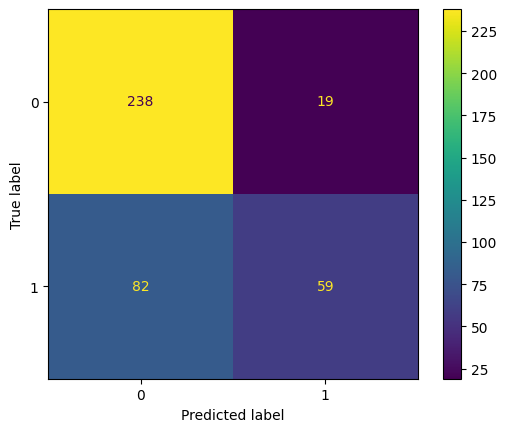

In [ ]:
Matrix_Confusion_metrics(y_svm_pred2 , y_test2)

**Nota:** En este se presenta que solo la precisión se mantiene estable, las otras dos métricas caen haciendo el modelo un mal candidato a solución del problema.

## **Modelo Redes Neuronales**

Inicialmente partimos el conjunto de entrenamiento en dos, donde uno sea el cojunto de entrenamiento y el otro el conjunto de validación, en donde sea 80% entrenamiento, 20% validación dando un 64% del total en entrenamiento y 16% en validación. Además escalamos estos datos.

In [ ]:
# Particion en conjunto de train y validación
X_train, X_val, y_train, y_val = train_test_split(
                                        X_train,
                                        y_train,
                                        train_size   = 0.8,
                                        random_state = 42
                                    )

# Escalamiento de los datos
scaler_train = preprocessing.StandardScaler()
scaler_val = preprocessing.StandardScaler()

scaler_train.fit(X_train)
scaler_val.fit(X_val)

X_train_scaled = scaler_train.transform(X_train)
X_val_scaled = scaler_val.transform(X_val)


### **preparación de los dataset**
 
Inicialmente se realizan las preparaciones para convertir los datos en datasets de tensores con tal de poder emplear las utilidades de estos como lo es el proceso de backpropagation.

In [ ]:
# Preparación de los datos 
class MyDataset():
 
  def __init__(self,x,y):
    y=y.values
    X=x
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y)
   
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

train_sec=MyDataset(X_train_scaled,y_train)
test_sec=MyDataset(X_test_scaled,y_test)
val_sec=MyDataset(X_val_scaled,y_val)

# Conversion de dataset a DataLoard para poder utilizar las metricas y optimizadores de pythoch
train_data=DataLoader(
    train_sec,
    batch_size=1,
    shuffle=False,
 )

test_data=DataLoader(
    test_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

val_data=DataLoader(
    val_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

for i, (data, labels) in enumerate(test_data):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([3, 8]) torch.Size([3])
tensor([[-0.5538, -0.4501,  0.2124,  1.6080,  0.6727,  0.4213, -0.4858, -0.4937],
        [-1.2568,  1.2623, -0.4281,  1.6080,  0.6727,  0.4213, -0.4858,  2.0255],
        [-0.2022,  0.7354,  1.4934, -0.6219,  0.6727,  0.4213, -0.4858,  2.0255]]) tensor([0., 1., 0.])


### **Definicion clase NET**
Desarrollamos una red neuronal de dos capas, la primera es una función lineal con entrada de 8 y una única salida y la segunda es una capa sigmoide. Además, como criterio tomamos Binary Cross entropy loss ya que tenemos únicamente una salida en donde puede ser 0 o 1 y no múltiples. también tomamos el optimizador del descenso del gradiente. El entrenamiento durara 100 épocas para que el modelo se adapte a los datos de manera eficiente evitando underfitting y overfitting.

In [ ]:
# Definición de la clase Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8,2)
        self.fc2 = nn.Linear(2,1)
        self.fc3 = nn.Sigmoid()

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

model=Net()

optimizer= torch.optim.SGD(model.parameters(), lr=0.1)
criterion= nn.BCELoss()

# Entrenar el modelo 
def train_model(model,optimizer,loss_module,train_loader,valid_loader,num_epochs):
  
  valid_loss_min =np.inf  
  
  for i in range(num_epochs):
    model.train()
    train_loss = 0.0
    v_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()

        preds = model(data)
        preds = preds.squeeze(dim=1)

        loss = loss_module(preds, target)
                
        loss.backward()

        optimizer.step()

        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.dataset) 

    model.eval()


    for data,target in valid_loader:
      output=model(data)
      target = target.type(torch.LongTensor)
      target = target.unsqueeze(1)
      valid_loss= criterion(output, target.float())
      valid_loss += loss.item()*data.size(0)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    #imprimir estadísticas de entrenamiento y validación
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        i, train_loss, valid_loss))
    

    #Guardamos el modelo con el menor error de validación.
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_1.pt')
        valid_loss_min = valid_loss


train_model(model, optimizer,criterion,train_data,val_data,100)
    
    

Epoch: 0 	Training Loss: 0.553917 	Validation Loss: 0.008793
Validation loss decreased (inf --> 0.008793).  Saving model ...
Epoch: 1 	Training Loss: 0.529788 	Validation Loss: 0.007624
Validation loss decreased (0.008793 --> 0.007624).  Saving model ...
Epoch: 2 	Training Loss: 0.517088 	Validation Loss: 0.007663
Epoch: 3 	Training Loss: 0.511992 	Validation Loss: 0.007432
Validation loss decreased (0.007624 --> 0.007432).  Saving model ...
Epoch: 4 	Training Loss: 0.509754 	Validation Loss: 0.007352
Validation loss decreased (0.007432 --> 0.007352).  Saving model ...
Epoch: 5 	Training Loss: 0.508442 	Validation Loss: 0.007309
Validation loss decreased (0.007352 --> 0.007309).  Saving model ...
Epoch: 6 	Training Loss: 0.507527 	Validation Loss: 0.007279
Validation loss decreased (0.007309 --> 0.007279).  Saving model ...
Epoch: 7 	Training Loss: 0.506766 	Validation Loss: 0.007237
Validation loss decreased (0.007279 --> 0.007237).  Saving model ...
Epoch: 8 	Training Loss: 0.506142 

### **Prueba del modelo**

Para la prueba del  modelo utilizaremos como función de perdida el BSELoss y como metrica de evalución el *Acurracy* del modelo.

In [ ]:
test_loss=0.0

criterion=  nn.BCELoss()
for data, target in test_data:
  output=model(data)
  target = target.type(torch.LongTensor)
  target = target.unsqueeze(1)
  loss= criterion(output,target.float())
  test_loss += loss.item()*data.size(0)
test_loss = test_loss/len(test_data.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))


model.eval()
total, correct =0,0
for i, data in enumerate(test_data, 0):
    inputs, labels = data[0], data[1]
    
    inputs = inputs.view(-1, 8)

    outputs = model(inputs)
    outputs = (outputs > 0.5).long().squeeze()

   
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
    
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

Test Loss: 0.509437

The testing set accuracy of the network is: 76 %


### **Escoger una muestra aleatoria del Dataset**
Queremos ver como estan dando las predicciones al tomar dos muestras aleatorias de nuestro dataset y pasarlo por tres diferentes modelos como son nuestro mejor modelo que es el arbol de desición podado con un *Acurracy* de 84%, dos modelos intermedios como son el random Forest con *Acurracy* de 81% y la red neuronal con un *Acurracy* de 76%. Tambien nuestro peor modelo que es SVM con un *Acurracy* de 74%.

In [ ]:
# Unimos las dos variables X y Y 
df_all1 = pd.concat([X,y],axis = 1)
# Sacamos dos muetsras
sample1 = df_all1.sample(2)
sample1.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,EverTravelledAbroad_Yes,FrequentFlyer_Yes,GraduateOrNot_Yes,TravelInsurance
1068,27,500000,4,1,0,1,0,0,1
1104,34,1000000,5,0,1,1,0,0,0


In [ ]:
# Separamos en dos muestras X y y
sample_y = sample1[['TravelInsurance']]
sample_x = sample1.drop(columns = ['TravelInsurance'])
sample_y.head()

,TravelInsurance
1068,1
1104,0


In [ ]:
# Escalamos las muestras x
scaler_sampleN = preprocessing.StandardScaler()
scaler_sampleN.fit(sample_x)
scaled_sampleN = scaler_sampleN.transform(sample_x)

**Arbol de Desición**

In [ ]:
y_predict = best_tree_clf.predict(scaled_sampleN)
print('Prediccion', y_predict)
print('Original', sample_y)

Prediccion [0 1]
Original       TravelInsurance
1068                1
1104                0


**Random Forest**

In [ ]:
y_pred = rfor_clf.predict(scaled_sampleN )
print('Prediccion', y_pred)
print('Original', sample_y)

Prediccion [0 1]
Original       TravelInsurance
1068                1
1104                0


**Red Neuronal**

In [ ]:
#Pasamos nuestros datos sin la muestra para ser preparados.
sample_sec=MyDataset(scaled_sampleN , sample_y)

# Definimos el Sample Data
sample_data=DataLoader(
    sample_sec,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

outputs = []
for data, target in sample_data:
    output=model(data)
    for i in range(output.size(0)):
        output = (output > 0.5).long().squeeze()
        outputs.append(output)


print('Predicciones:',(outputs))
print('Originales',(sample1[['TravelInsurance']]))

Predicciones: [tensor(0), tensor(1)]
Originales       TravelInsurance
1068                1
1104                0


**SVM**

In [ ]:
y_pred = clf_svm.predict(scaled_sampleN )
print('Prediccion', y_pred)
print('Original', sample_y)

Prediccion [0 0]
Original       TravelInsurance
1068                1
1104                0


**Modelo de Red neurnal**

Realizaremos otra red neuronal tomando los datos en los cuales la variable *FamilyMembers* se tomo como una dummie, unicamente para poder observar en que puede cambien el modelo.Ahora, realizaremos primero la partición de los datos en conjunto de entrenamiento con 80% y conjunto de validación con 20%.

In [ ]:
# Particion en conjunto de train y validación
X_train2, X_val2, y_train2, y_val2 = train_test_split(
                                        X_train2,
                                        y_train2,
                                        train_size   = 0.8,
                                        random_state = 42
                                    )

# Escalamiento de los datos
scaler_train = preprocessing.StandardScaler()
scaler_val = preprocessing.StandardScaler()

scaler_train.fit(X_train2)
scaler_val.fit(X_val2)

X_train2_scaled = scaler_train.transform(X_train2)
X_val2_scaled = scaler_val.transform(X_val2)


###**Preparación de los datos**
Preparamos los datos y covertimos nuestro dataset a dataloader para utilizar las metricas y funciones de pytoch


In [ ]:
# Preparacion datos
class MyDataset():
 
  def __init__(self,x,y):
    y=y.values
    X=x
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y)
   
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

train_sec=MyDataset(X_train2_scaled,y_train2)
test_sec=MyDataset(X_test2_scaled,y_test2)
val_sec=MyDataset(X_val2_scaled,y_val2)

# Conversion de dataset a dataloader
train_data=DataLoader(
    train_sec,
    batch_size=1,
    shuffle=False,
 )

test_data=DataLoader(
    test_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

val_data=DataLoader(
    val_sec,
    batch_size=3,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

for i, (data, labels) in enumerate(test_data):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([3, 14]) torch.Size([3])
tensor([[-0.5538, -0.4501,  1.6080,  0.6727,  0.4213, -0.4858, -0.4937, -0.4937,
         -0.6531,  2.0255, -0.3962, -0.2906, -0.1838, -0.1521],
        [-1.2568,  1.2623,  1.6080,  0.6727,  0.4213, -0.4858,  2.0255, -0.4937,
          1.5312, -0.4937, -0.3962, -0.2906, -0.1838, -0.1521],
        [-0.2022,  0.7354, -0.6219,  0.6727,  0.4213, -0.4858,  2.0255, -0.4937,
         -0.6531, -0.4937, -0.3962,  3.4407, -0.1838, -0.1521]]) tensor([0., 1., 0.])


### **Definición clase Net**
El único cambio en la estructura de la red neuronal para este caso será el aumento de las variables de entrada para la capa lineal.

In [ ]:
# Definición de la clase Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(14,1)
        self.fc3 = nn.Sigmoid()

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc3(x)
        return x

model=Net()

optimizer= torch.optim.SGD(model.parameters(), lr=0.1)
criterion= nn.BCELoss()

def train_model(model,optimizer,loss_module,train_loader,valid_loader,num_epochs):
  
  valid_loss_min =np.inf  
  
  for i in range(num_epochs):
    model.train()
    train_loss = 0.0
    v_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()

        preds = model(data)
        preds = preds.squeeze(dim=1)

        loss = loss_module(preds, target)
                
        loss.backward()

        optimizer.step()

        train_loss += loss.item()*data.size(0)

    train_loss = train_loss/len(train_loader.dataset) 

    model.eval()


    for data,target in valid_loader:
      output=model(data)
      target = target.type(torch.LongTensor)
      target = target.unsqueeze(1)
      valid_loss= criterion(output, target.float())
      valid_loss += loss.item()*data.size(0)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    #imprimir estadísticas de entrenamiento y validación
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        i, train_loss, valid_loss))
    

    #Guardamos el modelo con el menor error de validación.
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_2.pt')
        valid_loss_min = valid_loss


train_model(model, optimizer,criterion,train_data,val_data,100)

Epoch: 0 	Training Loss: 0.562263 	Validation Loss: 0.014430
Validation loss decreased (inf --> 0.014430).  Saving model ...
Epoch: 1 	Training Loss: 0.546405 	Validation Loss: 0.014836
Epoch: 2 	Training Loss: 0.542411 	Validation Loss: 0.014845
Epoch: 3 	Training Loss: 0.540767 	Validation Loss: 0.014671
Epoch: 4 	Training Loss: 0.538622 	Validation Loss: 0.014556
Epoch: 5 	Training Loss: 0.537478 	Validation Loss: 0.014531
Epoch: 6 	Training Loss: 0.536546 	Validation Loss: 0.014496
Epoch: 7 	Training Loss: 0.536333 	Validation Loss: 0.014496
Epoch: 8 	Training Loss: 0.535910 	Validation Loss: 0.014484
Epoch: 9 	Training Loss: 0.535676 	Validation Loss: 0.014475
Epoch: 10 	Training Loss: 0.535260 	Validation Loss: 0.014465
Epoch: 11 	Training Loss: 0.534784 	Validation Loss: 0.014455
Epoch: 12 	Training Loss: 0.534690 	Validation Loss: 0.014449
Epoch: 13 	Training Loss: 0.534342 	Validation Loss: 0.014445
Epoch: 14 	Training Loss: 0.534068 	Validation Loss: 0.014441
Epoch: 15 	Train

In [ ]:
test_loss=0.0

criterion= nn.BCELoss()
for data, target in test_data:
  output=model(data)
  target = target.type(torch.LongTensor)
  target = target.unsqueeze(1)
  loss= criterion(output,target.float())
  test_loss += loss.item()*data.size(0)
test_loss = test_loss/len(test_data.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))


model.eval()
total, correct =0,0
for i, data in enumerate(test_data, 0):
    inputs, labels = data[0], data[1]
    
    inputs = inputs.view(-1, 14)

    outputs = model(inputs)
    outputs = (outputs > 0.5).long().squeeze()

   
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
    
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

Test Loss: 0.536526

The testing set accuracy of the network is: 76 %


**Nota:** En el caso de las redes neuronales es más complicado realizar la visualización de las métricas utilizadas en los otros modelos. Sin embargo, la medición de accuracy indica que el modelo es subóptimo y da un resultado que no justifica cambiar el modelo inicial.

### **Escoger muestras aleatoria del Dataset**
Queremos ver como estan dando las predicciones al tomar dos muestras aleatorias de nuestro dataset y pasarlo por tres diferentes modelos como son nuestro mejor modelo que es el arbol de desición podado con un *Acurracy* de 85%, dos modelos intermedios como son el random Forest con *Acurracy* de 80% y la red neuronal con un *Acurracy* de 76%. Tambien nuestro peor modelo que es SVM con un *Acurracy* de 74%.

In [ ]:
# Unimos las dos variables X y Y 
df_all2 = pd.concat([X2,y],axis = 1)
# Sacamos dos muestras
sample = df_all2.sample(2)
sample.head()

,Age,AnnualIncome,ChronicDiseases,Employment Type_Private Sector/Self Employed,EverTravelledAbroad_Yes,FrequentFlyer_Yes,GraduateOrNot_Yes,FamilyMembers_3,FamilyMembers_4,FamilyMembers_5,FamilyMembers_6,FamilyMembers_7,FamilyMembers_8,FamilyMembers_9,TravelInsurance
1231,34,1500000,1,1,1,1,1,0,1,0,0,0,0,0,1
187,28,650000,0,1,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Dividimos las dos muestras en x y y
sample_y = sample[['TravelInsurance']]
sample_x = sample.drop(columns = ['TravelInsurance'])
sample_y.head()

,TravelInsurance
1231,1
187,0


In [ ]:
# Escalamos la muestra x 
scaler_sampleN = preprocessing.StandardScaler()

scaler_sampleN.fit(sample_x)
scaled_sampleN = scaler_sampleN.transform(sample_x)

**Arbol de Desición Podado**

In [ ]:
y_predict = best_tree_clf2.predict(scaled_sampleN)
print('Prediccion', y_predict)
print('Original', sample_y)

Prediccion [0 0]
Original       TravelInsurance
1231                1
187                 0


**Random Forest**

In [ ]:
y_pred2 = rfor_clf2.predict(scaled_sampleN )
print('Prediccion', y_pred2)
print('Original', sample_y)

Prediccion [0 0]
Original       TravelInsurance
1231                1
187                 0


**Red Neuronal**

In [ ]:
#Pasamos nuestros datos de la muestra para ser preparados.
sample_sec=MyDataset(scaled_sampleN , sample_y)

# Definimos el Sample Data
sample_data=DataLoader(
    sample_sec,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
 )

outputs = []
for data, target in sample_data:
    output=model(data)
    for i in range(output.size(0)):
        output = (output > 0.5).long().squeeze()
        outputs.append(output)


print('Predicciones', (outputs))
print('Valores originales',(sample[['TravelInsurance']]))

Predicciones [tensor(1), tensor(0)]
Valores originales       TravelInsurance
1231                1
187                 0


**SVM**

In [ ]:
y_pred2 = clf_svm2.predict(scaled_sampleN )
print('Prediccion', y_pred2)
print('Original', sample_y)

Prediccion [1 0]
Original       TravelInsurance
1231                1
187                 0


## **Conclusiones**
A partir del trabajo desarrollado adquirimos las siguientes conclusiones:

* Al realizar la estandarización de los datos ayudo a que los modelos mejoraran y tuvieran unas muy buenas metricas las cuales como el *Acurracy* variaba entre el 70% - 87% . Por otro lado el *Recall* nos daba datos un poco más pequeños lo que nos indica la habilidad del modelo para encontrar los valores *True Positive* donde entre más cercano a cero no se esta teniendo una muy buena habilidad en el modelo. Por esta razón destacamos que a pesar de tener un buen *Accurrancy* no indica que un modelo vaya a tener una buena clasificación de los datos.

* Los modelos que más destacaron en sus métricas y resultados según su matriz de confusión fueron los modelos realizados como los árboles de decisión, al podar estos árboles y utilizando ramdom forest, obteniendo unas métricas buenas para la clasificación del modelo. De estos se recomendaría usar los árboles podados en general y el modelo inicial de árbol sin podar en caso de que la clasificación de posibles clientes como no compradores tenga un peso de mayor importancia que la perdida de dinero en marketing para viajeros que no serán clientes. Sin embargo, cabe resaltar la poca observabilidad del proceso de clasificación del árbol sin podar al tener demasiadas hojas y una alta profundidad.

* A pesar de que ambas redes neuronales tuvieron un igual valor en el *Acurracy* notemos que el test loss para la primera red neuronal fue menor, eso nos podria señalar que este puede ser un poco más preciso que el segundo modelo de redes neuronales.

* Finalmente, nos dimos cuenta que los modelos que se realizaron con la variable *FamilyMembers* nos daben unas mejore metricas en general y que al realizar las pruebas con dos muestras teniamos más predicciones acertadas que en los modelos con la variable *FamilyMembers* original. Además, al escalar los datos tuvimos unos mejores resultados que al no tenerlos escalados.  

